# Capstone project 1

##  Bank marketing campagin

I choose dataset from this link "http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#"
The data is related with direct marketing campaigns of a Portuguese banking institution. 
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010)
bank-full.csv with all examples and 20 inputs
The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y)

### Attribute Information:


Clients Demographic Data


1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired',
    'self-employed','services','student','technician','unemployed','unknown')
    
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education
    (categorical:'basic.4y','basic.6y','basic.9y','high.school',
    'illiterate','professional.course', 'university.degree','unknown') 
    
5 - default: has credit in default? (categorical: 'no','yes','unknown')


6 - housing: has housing loan? (categorical: 'no','yes','unknown')


7 - loan: has personal loan? (categorical: 'no','yes','unknown')


Data related to previous contacts


8 - contact: contact communication type (categorical: 'cellular','telephone')


9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')


10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')


11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output 
     target (e.g., if duration=0 then y='no'). 
     Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. 
     Thus,  this input should only be included for 
     benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)


13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 
     means client was not previously contacted)
     
     
14 - previous: number of contacts performed before this campaign and for this client (numeric)


15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
     social and economic context attributes
     
     
Data related to social indicators
     
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)


17 - cons.price.idx: consumer price index - monthly indicator (numeric)


18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)


19 - euribor3m: euribor 3 month rate - The 3 month Euribor interest rate is the interest rate at which a selection of European banks lend one another funds denominated in euros whereby the loans have a maturity of 3 months.  (numeric) 	


20 - nr.employed: number of employees - quarterly indicator (numeric)


Output

21 - y - Has clients subscribed deposit or not? (yes or no)



### Data visualization potential questions for this dataset 



What's the age distribution of this dataset?

Does previous contacts matter regarding the result? 

What are the most 3 common occupation in this dataset? 

What's the relationship between the each features generally?

How did social economic indicators changed during the time of the campagin?

### Dataset general information

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/bankaddition/bank_additional_full.csv')
df.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
# Check about the columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [3]:
print(df['y'].value_counts())

no     36548
yes     4640
Name: y, dtype: int64


This is a very imbalanced dataset. There are 36548 data points are having y as 'no', but only 4640 having answers as 'yes'. Dataset needs oversampling or undersampling to deal with unbalanced dataset for later.

### Clients demographic data visualization

In [4]:
#count marital status for married, single, divorced and unknown
variable_marital=df['marital']
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

The histogram plot shows majority of the client in this dataset are married. Futher analysis can be conducted on this column later.

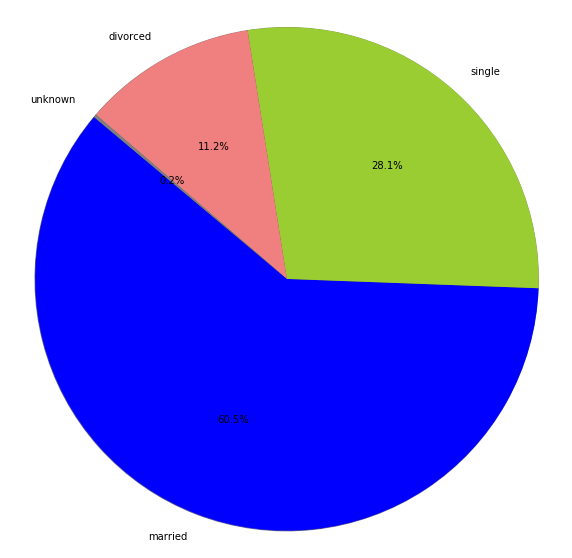

In [5]:
#plot pie plot on marital column
fig= plt.figure(figsize=(10,10))
labels = 'married', 'single', 'divorced', 'unknown'
sizes = [24928, 11568, 4612, 80]
colors = ['blue', 'yellowgreen', 'lightcoral', 'grey']
explode = (0, 0, 0, 0)  

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140,radius=20)

plt.axis('equal')
plt.show()

The pie plot shows majority (60.5%) of the client in this dataset are married

In [6]:
#print(df['job'])
variable_job=df['job']
print(df['job'].value_counts())

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


<class 'pandas.core.series.Series'>


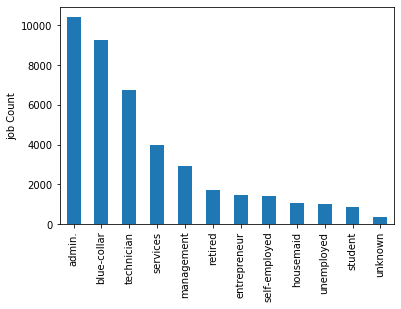

In [7]:
#count plot for job column
df['job'].value_counts().plot(kind='bar')
plt.ylabel('job Count')
#count plot is a kind of series plot
print(type(df['job'].value_counts()))
#what's their distribution like?

The histogram above shows that most 3 common occupation of the clients in this datasets are admin, blue collar and techician. This is valuable information for bank to find their their potential customers in the future.

In [8]:
#print(df['education'])
variable_education=df['education']
print(df['education'].value_counts())

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


Text(0, 0.5, 'education level Count')

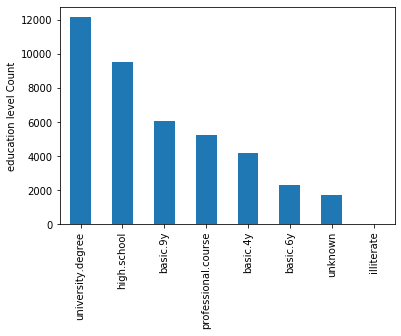

In [9]:
df['education'].value_counts().plot(kind='bar')
plt.ylabel('education level Count')


The histogram above shows that top 3 common education level in this data sets are university degree, high school and basic 9 years. This imformation also can help with targeting potentil customers.

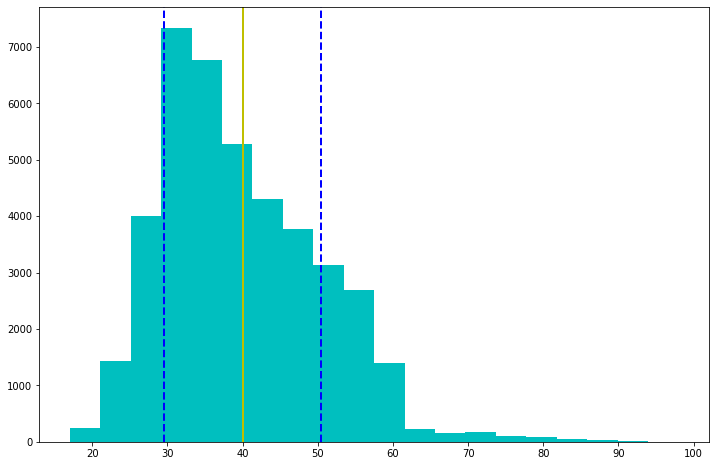

In [10]:
df['age'].isnull().values.any()
#set the bins range to values on the graph
#everytime extracting one column from data, it will be a series
#using plt historgram function to plot again with the mean,and std lines on the plot
plt.figure(figsize=(12,8))
plt.hist(df['age'], bins=20, color='c')
# Add a vertical line at the mean.
plt.axvline(df['age'].mean(), color='y', linestyle='solid', linewidth=2)

# Add a vertical line at one standard deviation above the mean.
plt.axvline(df['age'].mean() + df['age'].std(), color='b', linestyle='dashed', linewidth=2)

# Add a vertical line at one standard deviation below the mean.
plt.axvline(df['age'].mean()-df['age'].std(), color='b', linestyle='dashed', linewidth=2) 


The histogram above shows the age data is not normal distribution, and the mean is around 40, and the one std below mean is 30, 
and one std higher than mean is 50.

{'whiskers': [<matplotlib.lines.Line2D at 0x239200a6748>,
 'caps': [<matplotlib.lines.Line2D at 0x239200a6e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x239200a67b8>],
 'medians': [<matplotlib.lines.Line2D at 0x239200a6128>],
 'fliers': [<matplotlib.lines.Line2D at 0x239200f8898>],
 'means': []}

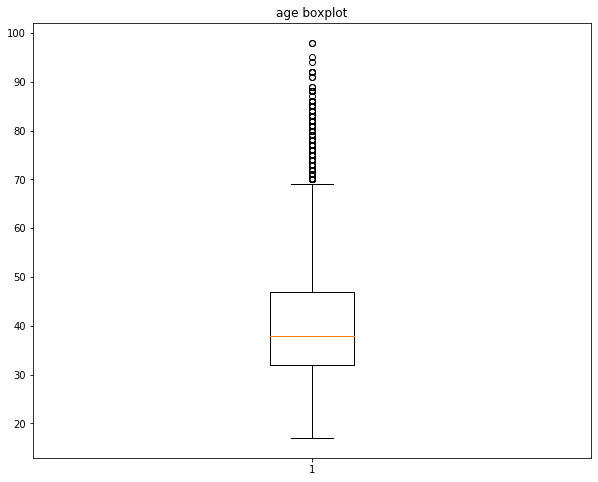

In [11]:
#boxplot for age
fig1, ax1 = plt.subplots(figsize=(10,8))
ax1.set_title('age boxplot')
ax1.boxplot(df['age'])

The boxplot above shows that median values of all the clients ages ranges around 36-38, and a few outliers which their ages 
ranges around 90-100.

Text(0, 0.5, 'counts')

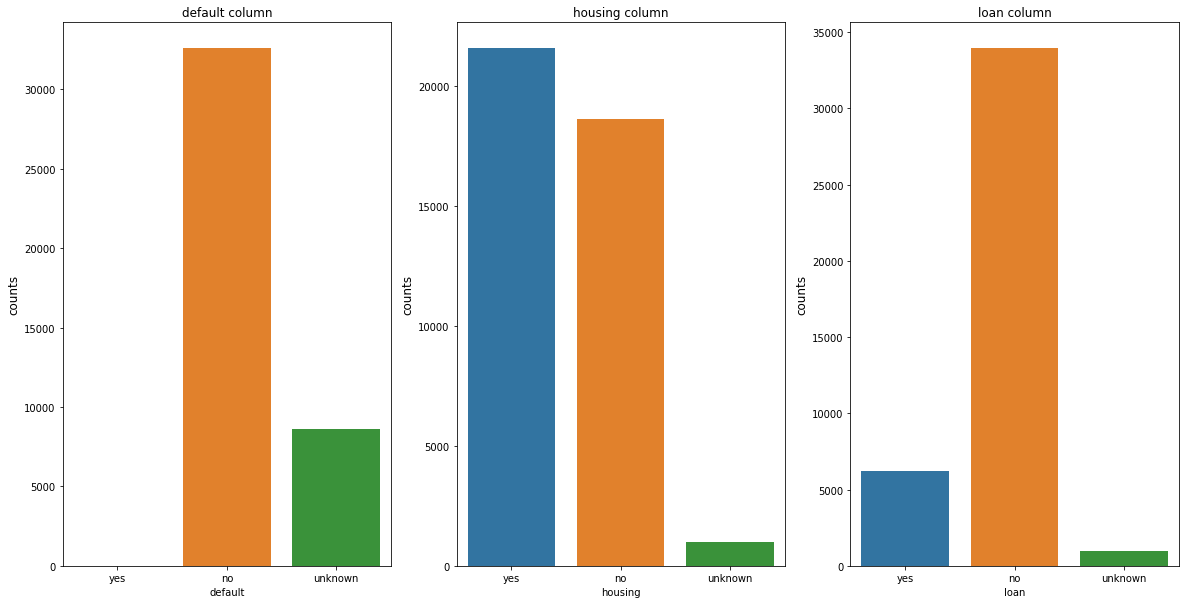

In [12]:
import seaborn as sns
# three subplot on columns default, housing, loan
fig,(ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(20,10))

sns.countplot(x='default',data=df,ax=ax1,order=['yes','no','unknown'])
ax1.set_title('default column',fontsize=12)
ax1.set_ylabel('counts',fontsize=12)

sns.countplot(x='housing',data=df,ax=ax2,order=['yes','no','unknown'])
ax2.set_title('housing column',fontsize=12)
ax2.set_ylabel('counts',fontsize=12)

sns.countplot(x='loan',data=df,ax=ax3,order=['yes','no','unknown'])
ax3.set_title('loan column',fontsize=12)
ax3.set_ylabel('counts',fontsize=12)


The plots below have some information on features default, housing and loan. 
Comparing between these three features, it's quite different between each other for default column, most of the data points are in 'no' value for housing column, largest group of data points are in yes. 
And second majority data points are in no, and unknow are very few comparing to the yes and no for the loan column, most of the data points are in no value, and a small amount of data points are yes, and very few of are from unknown

Interpreting the practical meaning of these plots are :
Most of the clients in this dataset didn't have default credit, and small amount of them are unknown. Most of the clients do have housing, and a little less than people who have housing, a large amount of people don't have housing, and very few people are unknown about wether they have housing or not.Most of the clients have no loan, a small amount of clients have loan, and very few of the clients information about loan are unknown.

Let's check out how many clients said yes to previous contacts even before this campaign here.

### Visualization on data related to previous contacts

In [13]:
print(df['poutcome'].value_counts())
print(type(df['poutcome']))

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64
<class 'pandas.core.series.Series'>


In [14]:
#find out the iloc indexes for these previous responses which are success
#for i in range(len(df)):
    #if df.iloc[i]['poutcome']== 'success':
         #print(i,df.iloc[i]['poutcome'],df.iloc[i]['y'])
count = 0
for index, row in df.iterrows():
    if row["poutcome"] == "success":
        print(index, row["poutcome"], row["y"])
        count += 1
        if count==10:
            break

24108 success no
24264 success no
24279 success no
24397 success no
24482 success no
24613 success yes
24799 success no
24850 success no
24910 success no
25053 success no


In [15]:
# And compare if these previous success responses clients also said yes to this campaign this time
count_previous_now=0
for i in range(0,len(df)):
    if df.iloc[i]['poutcome']=='success' and df.iloc[i]['y']=='yes':
        count_previous_now +=1
#count the total number of clients who said yes to this campaign and also had success previous outcome before
count_previous_now

894

In [16]:
print(894/4640)

0.19267241379310346


According to the previous result on column 'poutcome', 35563 nonexistence poutcome, 4252 failure poutcome , and 1373 success in total.
The total number of 'yes' response output in this dataset is 4640, and among these 'yes' responses, there are 894 'yes' responses have previous 'success' outcomes, which mean
It can be assumed that,about 19.26% 'yes' response have already did success business with this bank before. 
However,further analysis needs to be done for analyzing the relationships between the poutcome column and y column.

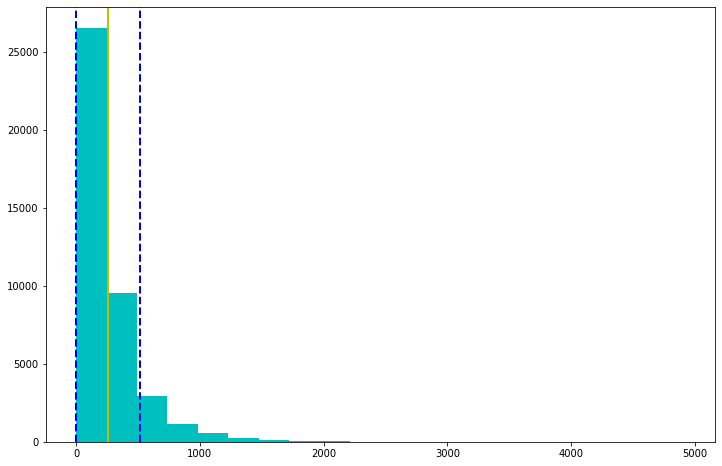

In [17]:
#plot histgram on column 'duration'
df['duration'].isnull().values.any()
#set the bins range to values on the graph
#everytime extracting one column from data, it will be a series
#using plt historgram function to plot again with the mean,and std lines on the plot
plt.figure(figsize=(12,8))
plt.hist(df['duration'], bins=20, color='c')
# Add a vertical line at the mean.
plt.axvline(df['duration'].mean(), color='y', linestyle='solid', linewidth=2)

# Add a vertical line at one standard deviation above the mean.
plt.axvline(df['duration'].mean() + df['duration'].std(), color='b', linestyle='dashed', linewidth=2)

# Add a vertical line at one standard deviation below the mean.
plt.axvline(df['duration'].mean()-df['duration'].std(), color='b', linestyle='dashed', linewidth=2) 

In [18]:
# take out column 'duration', and group by based on 'y' column to 'yes'and 'no'
df_yes = df[df['y'] == 'yes']
df_no = df[df['y']=='no']
#print(df_yes.head(10))
#print(df_no.head(10))
df_yes_duration = df_yes['duration']
df_no_duration = df_no['duration']
print(df_yes_duration.head(10))
print(df_no_duration.head(10))

75     1575
83     1042
88     1467
129     579
139     461
182     673
286     935
388    1201
389    1030
446    1623
Name: duration, dtype: int64
0    261
1    149
2    226
3    151
4    307
5    198
6    139
7    217
8    380
9     50
Name: duration, dtype: int64


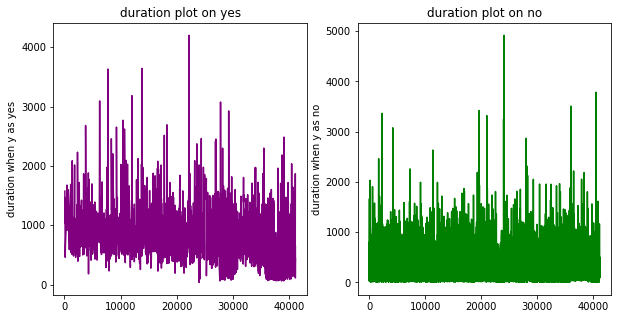

In [19]:
#plot random plot of the column 'duration' based on 'y' yes or no
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(df_yes_duration, color='purple')
plt.ylabel('duration when y as yes')
plt.title('duration plot on yes')

plt.subplot(1, 2, 2)
plt.plot(df_no_duration, color='green')
plt.ylabel('duration when y as no')
plt.title('duration plot on no')
plt.show()

The two plots above shows some difference between duration on yes and duration on no
first plot shows majority of the data points are within 200-2500, the plot on the right 
shows that majority of the data points are between 0-2000.

To interpret the information based on the real meaning of banking campagin, it can be assumed that 
clients who agreed to do deposit with the bank, were mostly spent more time taling with the bank agent 
And the clients who refused to do the deposit spent less time with the bank agent
this can be a fator to be dig deeper later for building model. 

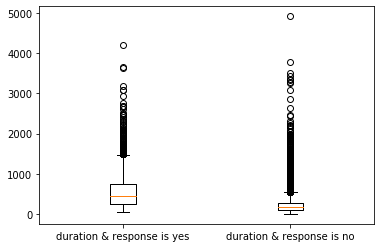

In [20]:
# after saw the simple plots above, I decided to plot box plots based on duration column for yes and no condition

data = [df_yes_duration,df_no_duration]

# Multiple box plots on one Axes
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(['duration & response is yes', 'duration & response is no'])
plt.show()


According to the box plots below, it clearly shows that when 'y' is yes, the duration values are clearly higher than when 'y' is no. When y is no, duration values have more outliers accodring to the plots below, further analysis should be done on this matter. Also duration with yes response data has much higher median value than duration with no response.

Here I will conduct same method on column "previous", to see wether the number of previous contacts before the campagin matters 
to the result. I group the 'previous' column based on 'y' column with 'yes' or 'no'.

In [21]:
# take out column 'previous', and group by based on 'y' column to 'yes'and 'no'
df_yes = df[df['y'] == 'yes']
df_no = df[df['y']=='no']
#print(df_yes.head(10))
#print(df_no.head(10))
df_yes_previous = df_yes['previous']
df_no_previous = df_no['previous']
#previous column: number of contacts performed before this campaign and for this client (numeric)


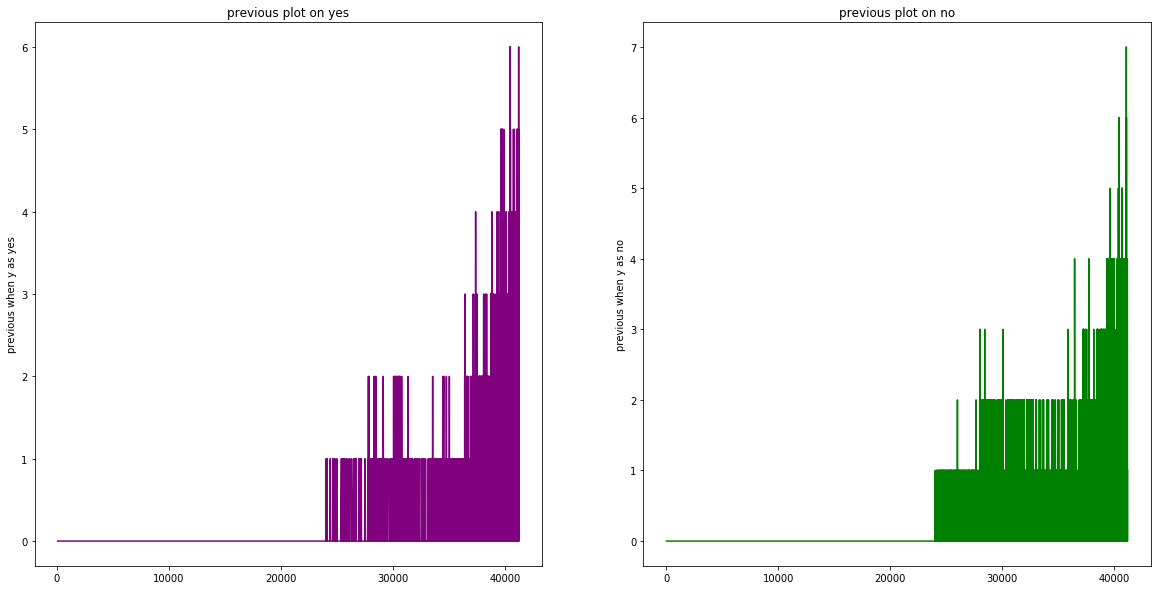

In [22]:
#plot line plot the column 'duration' based on 'y' yes or no

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(df_yes_previous, color='purple')
plt.ylabel('previous when y as yes')
plt.title('previous plot on yes')

plt.subplot(1, 2, 2)
plt.plot(df_no_previous, color='green')
plt.ylabel('previous when y as no')
plt.title('previous plot on no')
plt.show()


According to the two plots above it's clear to see 
that there is no clear difference on 'previous' when based on 'y' as yes and 'y' as no

Ploting the correlation plot of the whole dataset which will help seeing if there is and pattern or trend or close relationship/correlation between columns(variables), also this can help do feature selection/dimension reduction and helping build a fit model for dataset

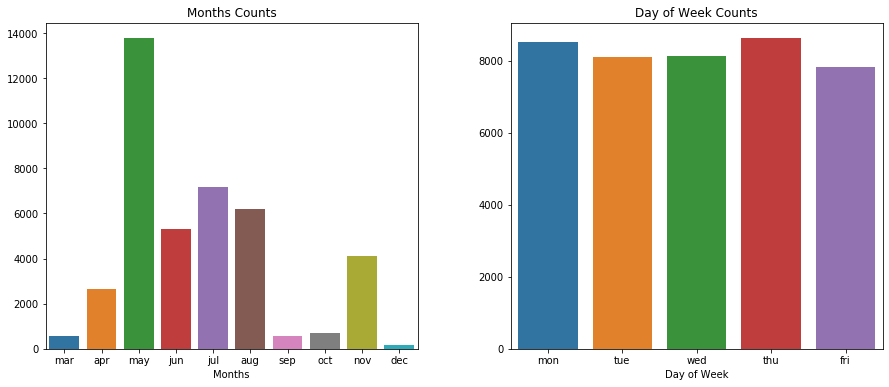

In [23]:
# Visualization on day_of_week feature and Month feature

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))

sns.countplot(df['month'], ax = ax1, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax1.set_xlabel('Months', fontsize = 10)
ax1.set_ylabel('')
ax1.set_title('Months Counts')
ax1.tick_params(labelsize=10)

sns.countplot(df['day_of_week'], ax = ax2)
ax2.set_xlabel('Day of Week', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Day of Week Counts')
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

According to the plots above, it's clear to see, during month May, July, Aug and Jun are busy time the bank contacting clients, especially May.
And there is no much difference among 5 week days regarding the contacts number from bank to clients.

### General visualization on data related to social indicators

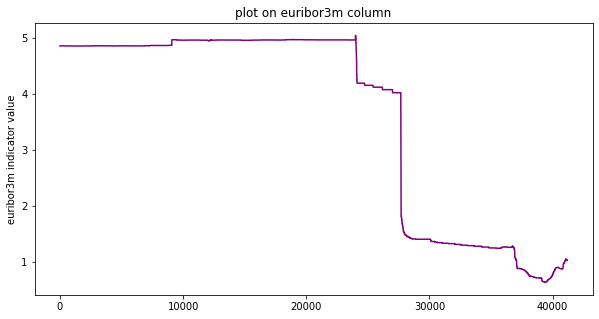

In [24]:
# Conduct line plot on column euribor3m 
#The 3 month Euribor interest rate is the interest rate at which a selection of European banks lend one another funds 
#denominated in euros whereby the loans have a maturity of 3 months. (numeric)

plt.figure(figsize=(10, 5))
plt.plot(df['euribor3m'], color='purple')
plt.ylabel('euribor3m indicator value')
plt.title('plot on euribor3m column')
plt.show()

From the plot above it's obvious to see that data points from index 0 to around index 25000, the euribor3m indicators had higher values than the rest of the data points. Especially around index 28000, there is hugely drastic drop of euribor3m value drop. In further research, maybe dig deeper into the column euribor3m to find out why there was this drastic change of euribor3m value change.

### Correlation plot 

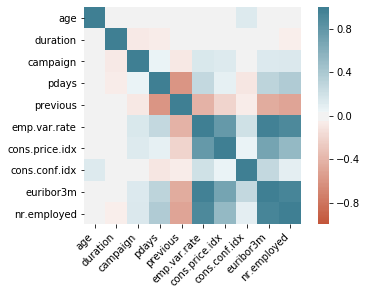

In [25]:
#plot correlation plot using seaborn heatmap function
corr = df.corr()
ax_heatmap = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax_heatmap.set_xticklabels(
    ax_heatmap.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#pandas crosstab for categrocial data comparison

From the heatmap above, it shows there are a few features have relatively strong positive and negative 
relationship with each other. Not all columns are not included in this correlation plot becasue there are categorical data columns in the data, which may needs to be converted to numeric data later when conduct further research on this data. It's necessary to plot this correlation plot again after every columns are converted to numeric data. 
euribor3m and nr.employmed has pretty strong positive relationship.
feature previous has some negative relationship with nr.employed feature.
emp.var.rate has strong positive nr.employed.
emp.var.rate has strong positive relationship with euribor3m.
previous column has strong negative relationship with pdays.
cons.price.idx has some positive relatioship with emp.var.rate.


All the corrolation relationships in this heatmap are very good hint to build a fit model later.


Now it's time to divide the data into several categories according to the original context of the data.
It's reasonale to divide the data into clients demographic features, data related to previous contact,social context features 
and the output column y

#### Separating Dataset into sub datasets

In [26]:
#create a subset of data as clients demographic data
demographic=df.iloc[:,0:7]
demographic.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [27]:
# Create a subset containing data related to previous contact
previous_contact_info=df.iloc[:,7:14]
previous_contact_info.head()

,contact,month,day_of_week,duration,campaign,pdays,previous
0,telephone,may,mon,261,1,999,0
1,telephone,may,mon,149,1,999,0
2,telephone,may,mon,226,1,999,0
3,telephone,may,mon,151,1,999,0
4,telephone,may,mon,307,1,999,0


In [28]:
# Create a subset containing clients social information
social_info=df.iloc[:,15:20]
social_info.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


## Further research topics

With the data analyzing and visualization above, it's clear to see that,age column is not normally distributed. The most 3 common occupation of clients from this dataset are Administrator, blue-collar worker and technician. 'duration' column data is not normally distributed either. The relationship between features are complex, there are strong positve correlations, weak positive correlations, strong negative correlations, and weak negative correlations. It need more research on the feature correlations. And some social economic indicators varies drasticlly between among different clients, and also this change needs further reserch as well. 
It's obvious that feature selection and model building will be conducted afterwards. 